#Prediction of Credit Card Approval


**Team members:** Isabella Kowalczyk, Pooja Vembu Rajan, Rajaram Madhavan


###**Project Objective**

The objective of the project is to build a web-based application using a Machine Learning Model that predicts the credit worthiness of potential customers who are submitting their applications for procuring a new credit card. Based on the prediction, a provisional approval for credit card application would be given, so the accuracy of this prediction is key.

# Exploratory Data Analysis

In [ ]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import textwrap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, precision_score, roc_auc_score, recall_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from time import time


In [ ]:
zip_file = "credit_card.zip"

# opening the zip file in READ mode
with ZipFile(zip_file, 'r') as zip:
    zip.printdir()
    print('Extracting...')
    zip.extractall()
    print('Extracted successfully!')


File Name                                             Modified             Size
Credit_card.csv                                2023-09-20 19:19:58       186815
Credit_card_label.csv                          2023-09-20 19:19:58        17042
Extracting...
Extracted successfully!


In [ ]:
#load data
cc_df    = pd.read_csv("Credit_card.csv")
cc_label = pd.read_csv("Credit_card_label.csv")

In [ ]:
print("Credit card dataset:")
print()
cc_df.head()

Credit card dataset:



,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
#shape and info

print("Shape of the CC dataset:",cc_df.shape)
print()
cc_df.info()

Shape of the CC dataset: (1548, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 n

In [ ]:
print("Credit card label dataset:")
print()
cc_label.head()

Credit card label dataset:



,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
#shape and info

print("Shape of the CC label dataset:",cc_label.shape)
print()
cc_label.info()

Shape of the CC label dataset: (1548, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [ ]:
#merge credit card data with labels for analysis

cc_final = pd.merge(cc_df, cc_label, on='Ind_ID')
cc_final.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
cc_final.shape

(1548, 19)

## Outlier and Missing data analysis

### Assessing outliers

In [ ]:
#Outlier analysis using summary statistics on quantitative variables

cc_final.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


<Axes: >

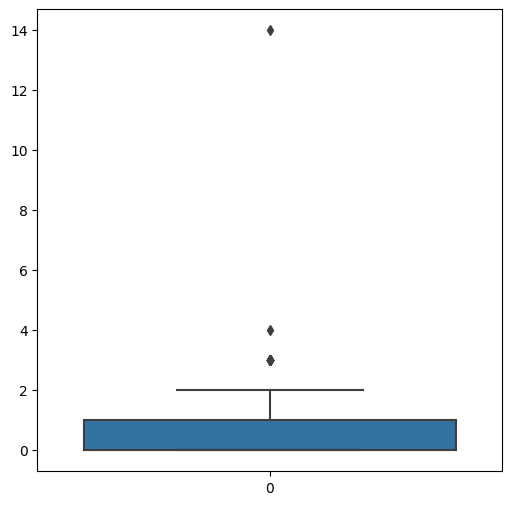

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(cc_final['CHILDREN'])

The 'Children' column has three outliers where a family has more than 2 children when compared to the sample which commonly has 2 or less children.

<Axes: >

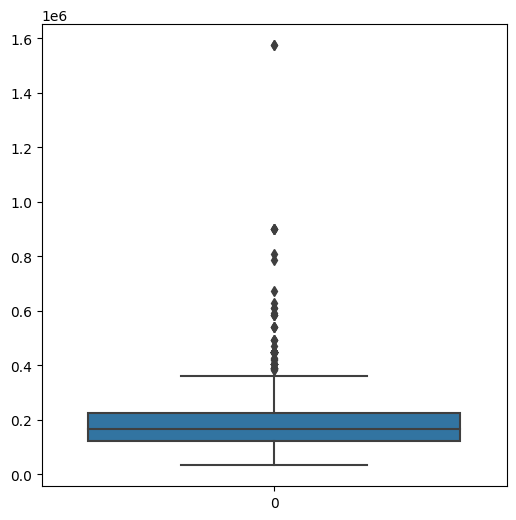

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(cc_final['Annual_income'])

The 'Annual_income' column has handful set of outliers where there are people who earn annually greater than `$`380k compared to the population who have their earnings around a minimum of `$`33k and a maximum of `$` 380k that have applied for credit cards.

<Axes: >

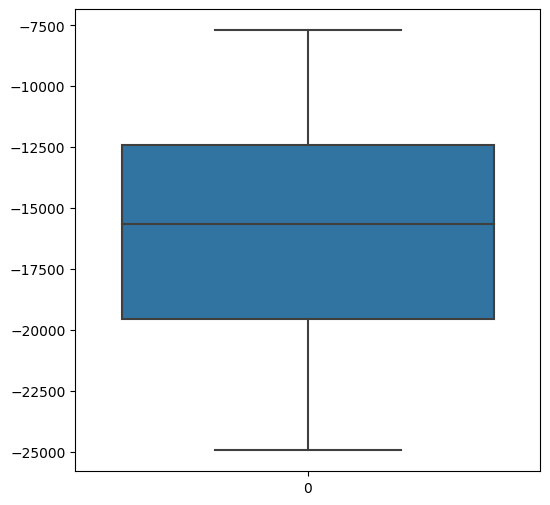

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(cc_final['Birthday_count'])

The 'Birthday_count' column does not have any outliers meaning age groups who are eligible to apply for credit card are present where a person is at the age capable of earning.

<Axes: >

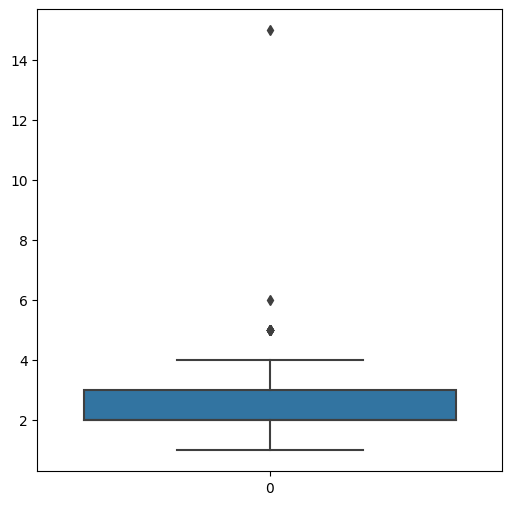

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(cc_final['Family_Members'])

From the rest of the sample, there are families that have more than 4 family members that have applied for credit cards

### Assessing missing data

In [ ]:
#Missing data analysis
cc_final.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

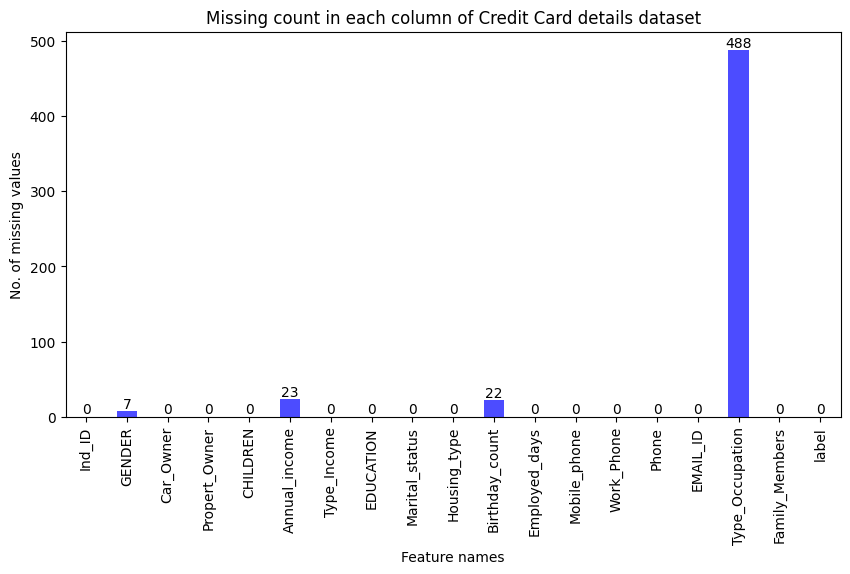

In [ ]:
missing_val = cc_final.isna().sum()

#visualise the missing data count for each column
fig, axes = plt.subplots(figsize=(10, 5))
missing_val.plot.bar(ax=axes, color="blue", alpha=0.7)
axes.set_xlabel("Feature names")
axes.set_ylabel("No. of missing values")
axes.set_title("Missing count in each column of Credit Card details dataset")
axes.bar_label(axes.containers[0])
plt.show()

## Variable visualisations

### Univariate visualisations

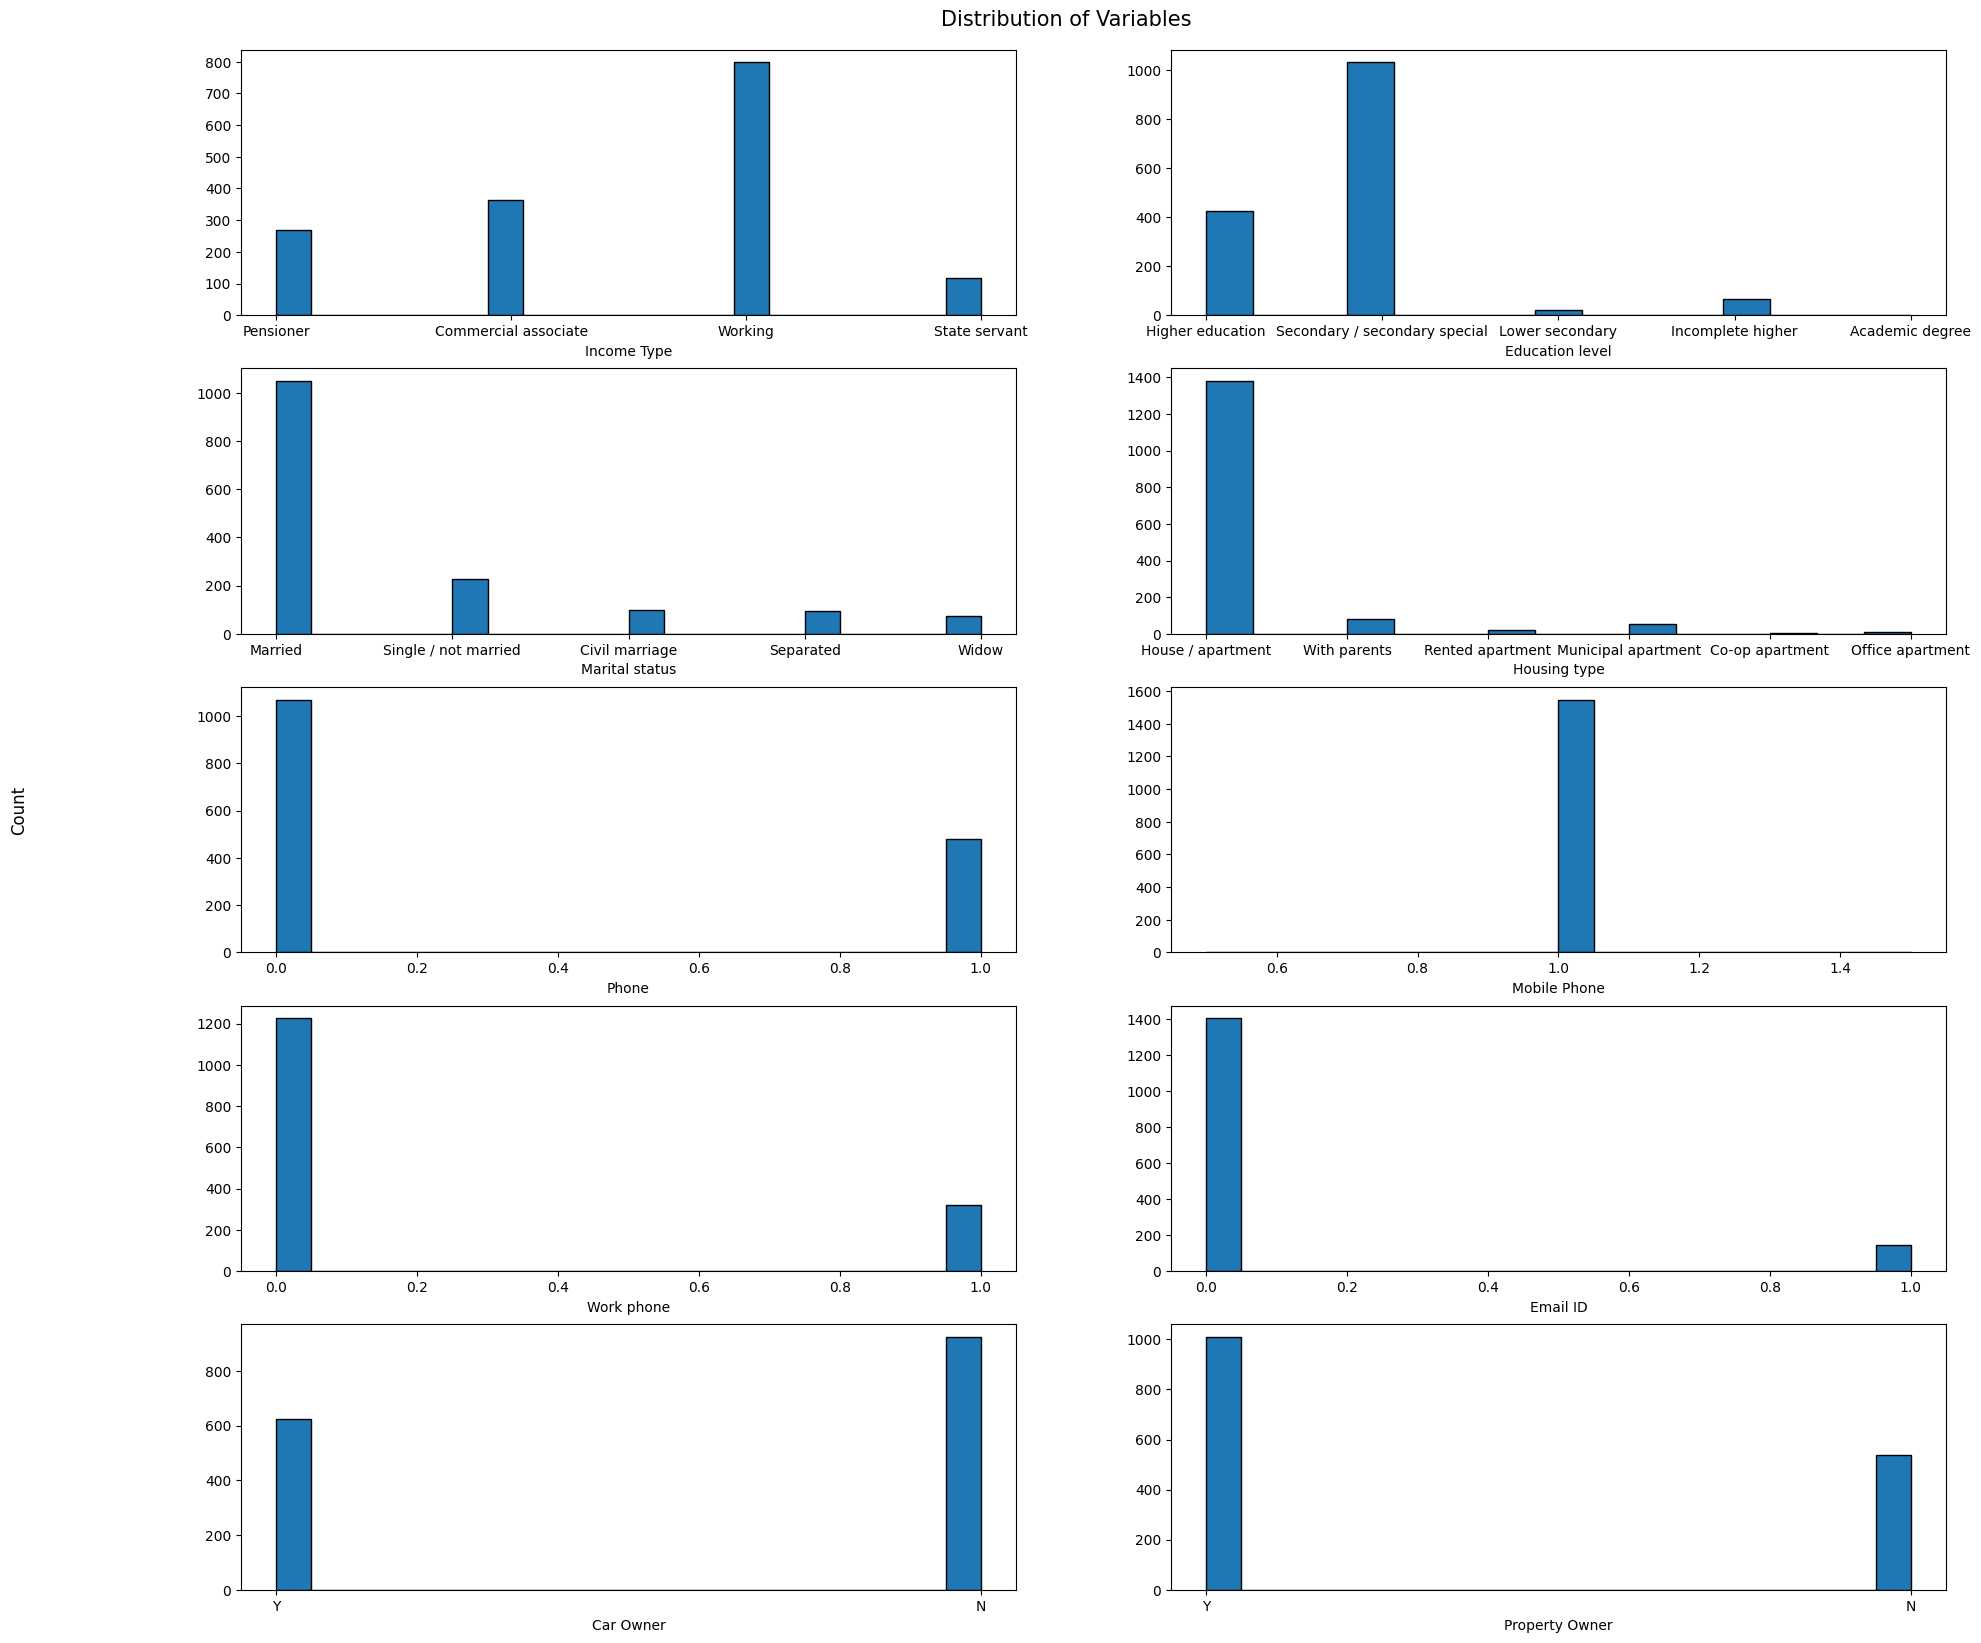

In [ ]:
#distribution of categorical variables including variables that has yes/no values that are non null
fig, ax = plt.subplots(5,2, figsize=(22,20))
ax[0,0].hist(cc_final['Type_Income'],edgecolor = 'black',bins = 20)
ax[0,0].set_xlabel('Income Type')
ax[0,1].hist(cc_final['EDUCATION'],edgecolor = 'black',bins = 15)
ax[0,1].set_xlabel('Education level')
ax[1,0].hist(cc_final['Marital_status'],edgecolor = 'black',bins = 20)
ax[1,0].set_xlabel('Marital status')
ax[1,1].hist(cc_final['Housing_type'],edgecolor = 'black',bins = 15)
ax[1,1].set_xlabel('Housing type')
ax[2,0].hist(cc_final['Phone'],edgecolor = 'black',bins = 20)
ax[2,0].set_xlabel('Phone')
ax[2,1].hist(cc_final['Mobile_phone'],edgecolor = 'black',bins = 20)
ax[2,1].set_xlabel('Mobile Phone')
ax[3,0].hist(cc_final['Work_Phone'],edgecolor = 'black',bins = 20)
ax[3,0].set_xlabel('Work phone')
ax[3,1].hist(cc_final['EMAIL_ID'],edgecolor = 'black',bins = 20)
ax[3,1].set_xlabel('Email ID')
ax[4,0].hist(cc_final['Car_Owner'],edgecolor = 'black',bins = 20)
ax[4,0].set_xlabel('Car Owner')
ax[4,1].hist(cc_final['Propert_Owner'],edgecolor = 'black',bins = 20)
ax[4,1].set_xlabel('Property Owner')
fig.supylabel('Count')
fig.suptitle('Distribution of Variables', fontsize = 15, y = 0.9)
plt.show()

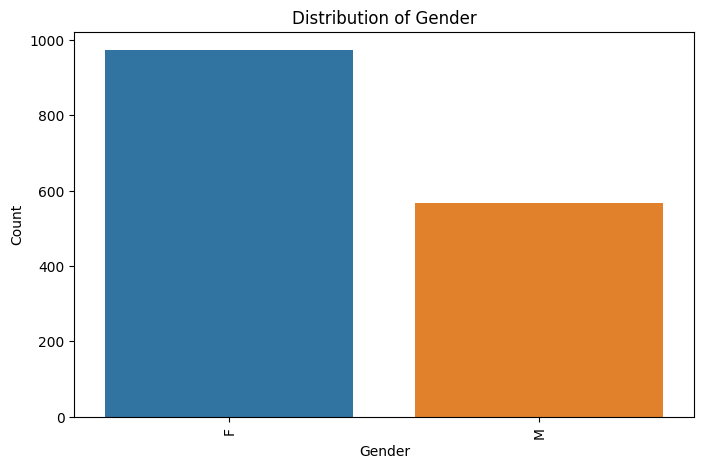

In [ ]:
#distribution of null variables
plt.figure(figsize=(8, 5))

sns.barplot(x = cc_final.GENDER.value_counts().index, y=cc_final.GENDER.value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=90)
plt.show()

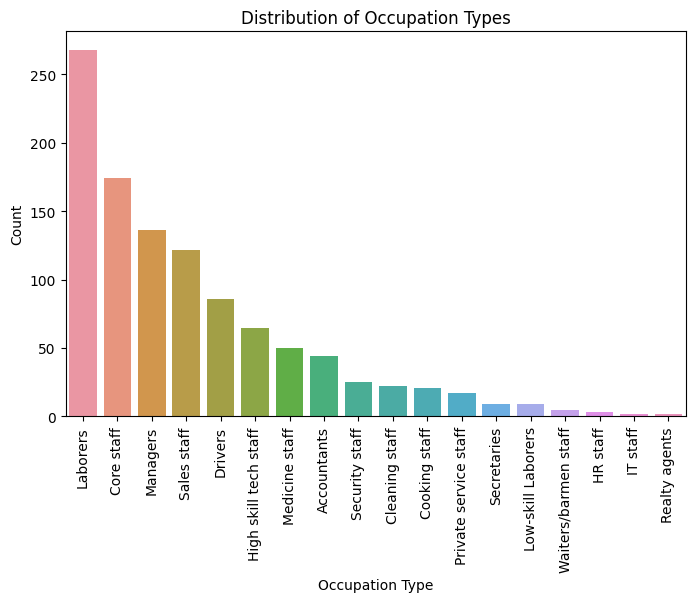

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(x = cc_final.Type_Occupation.value_counts().index, y=cc_final.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupation Types')
plt.xticks(rotation=90)
plt.show()

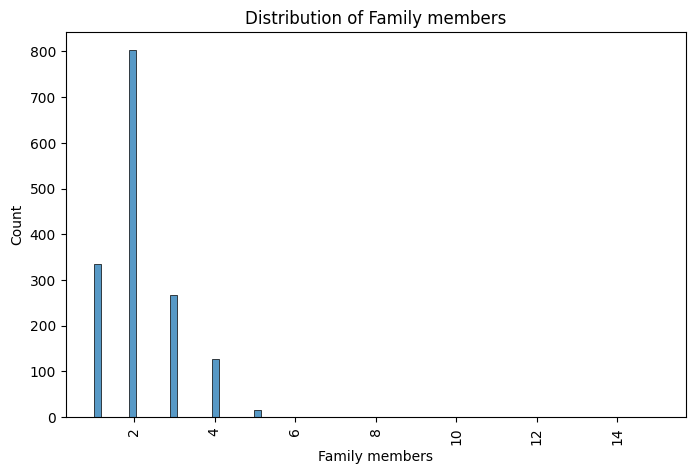

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(x = cc_final.Family_Members)
plt.xlabel('Family members')
plt.ylabel('Count')
plt.title('Distribution of Family members')
plt.xticks(rotation=90)
plt.show()

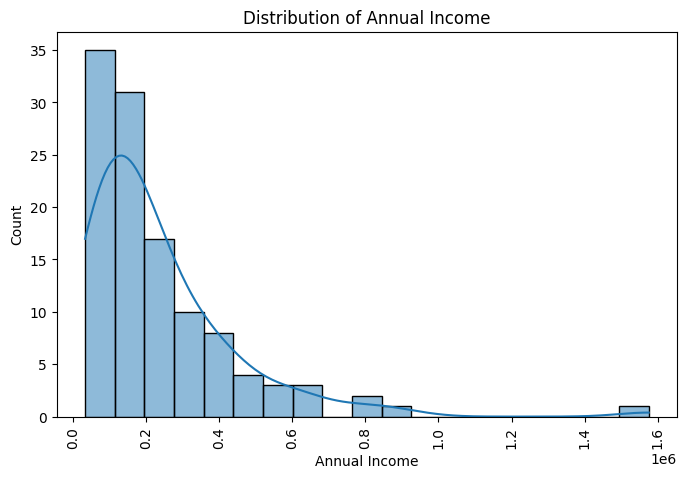

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(x = cc_final.Annual_income.value_counts().index, kde= True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.xticks(rotation=90)
plt.show()

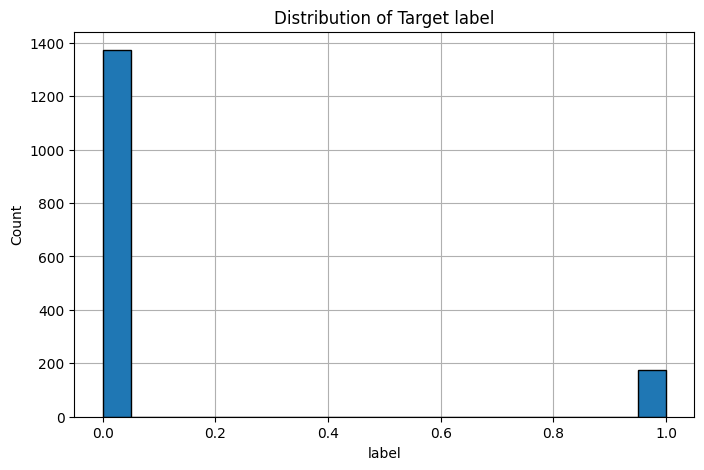

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
cc_final['label'].hist(edgecolor = 'black', bins = 20)
ax.set_xlabel('label')
ax.set_ylabel('Count')
ax.set_title('Distribution of Target label')
ax.set_axisbelow(True)
plt.show()

The target labels are heavily imbalanced where majority of credit cards were approved for the applicants and less data for rejections.

### Bivariate visualisations

The pairwise relationships between the **numerical features** are analysed using the pairplot from Seaborn library.

Text(0.5, 1, 'Pairwise plot visualisations between numeric data')

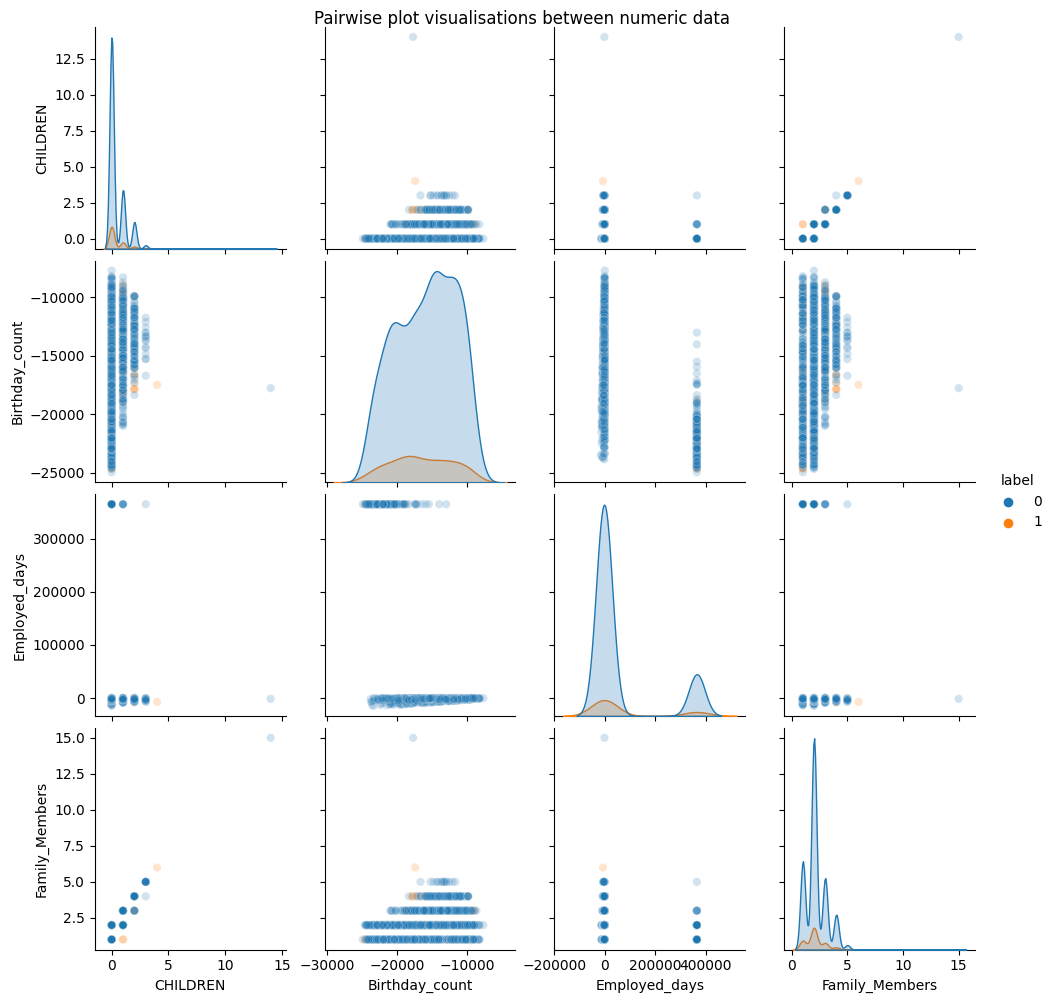

In [ ]:
pairwise_df = cc_final[['CHILDREN','Birthday_count','Employed_days','Family_Members','label']]

sns.pairplot(pairwise_df, diag_kind="kde",hue = 'label', plot_kws={"alpha": 0.2}).fig.suptitle('Pairwise plot visualisations between numeric data', y = 1)

Relationships between **categorical data** is analysed using bar charts and boxplot graphs.

<Axes: xlabel='Annual_income', ylabel='Type_Occupation'>

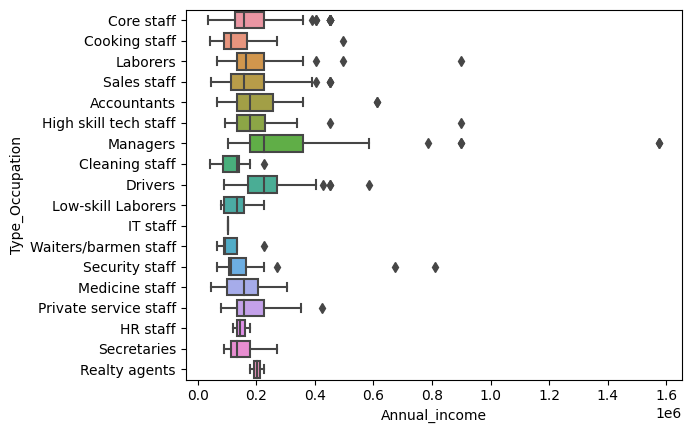

In [ ]:
sns.boxplot(x="Annual_income",y="Type_Occupation",data=cc_final)

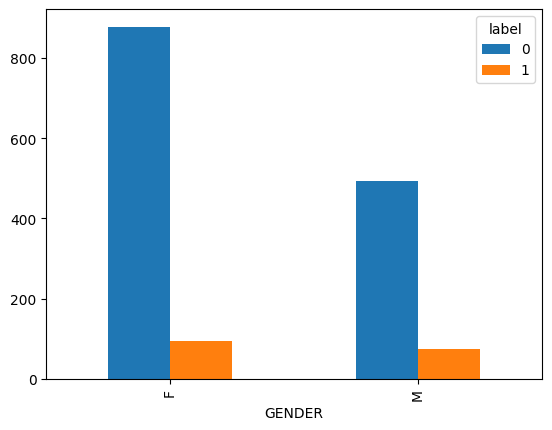

In [ ]:
gen_approval = cc_final[['GENDER','label']]
df = gen_approval.pivot_table(index='GENDER', columns = 'label', values = 'label', aggfunc='size')
df.plot(kind='bar')
plt.show()


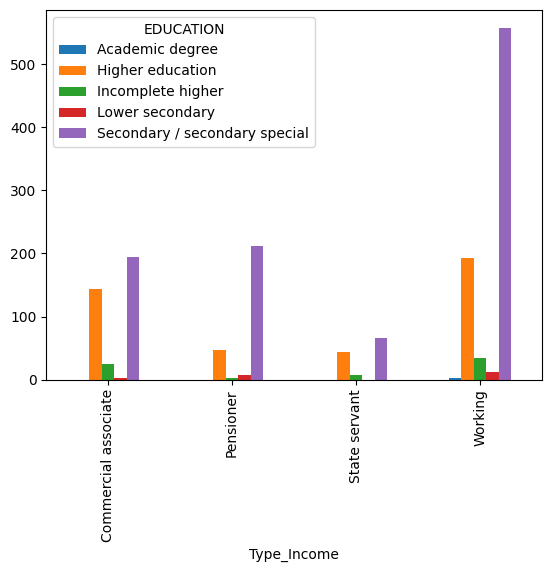

In [ ]:
df = cc_final.pivot_table(index='Type_Income', columns = 'EDUCATION', values = 'label', aggfunc='size')
df.plot(kind='bar')
plt.show()


### Correlation analysis

In [ ]:
corr_df = cc_final.drop(['Ind_ID','Mobile_phone'], axis = 'columns')
corr_df.corr()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
CHILDREN,1.000000,0.078497,0.279716,-0.219095,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.078497,1.000000,0.111638,-0.160175,-0.071171,-0.006439,0.122320,0.050957,0.027456
Birthday_count,0.279716,0.111638,1.000000,-0.619039,0.174687,-0.029215,0.166749,0.266527,-0.045097
Employed_days,-0.219095,-0.160175,-0.619039,1.000000,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Work_Phone,0.035014,-0.071171,0.174687,-0.231184,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,-0.004908,-0.006439,-0.029215,-0.003403,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,0.025776,0.122320,0.166749,-0.118268,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.890248,0.050957,0.266527,-0.238705,0.072228,0.005372,0.035098,1.000000,-0.030709
label,-0.021646,0.027456,-0.045097,0.031408,-0.007046,-0.000664,0.012921,-0.030709,1.000000


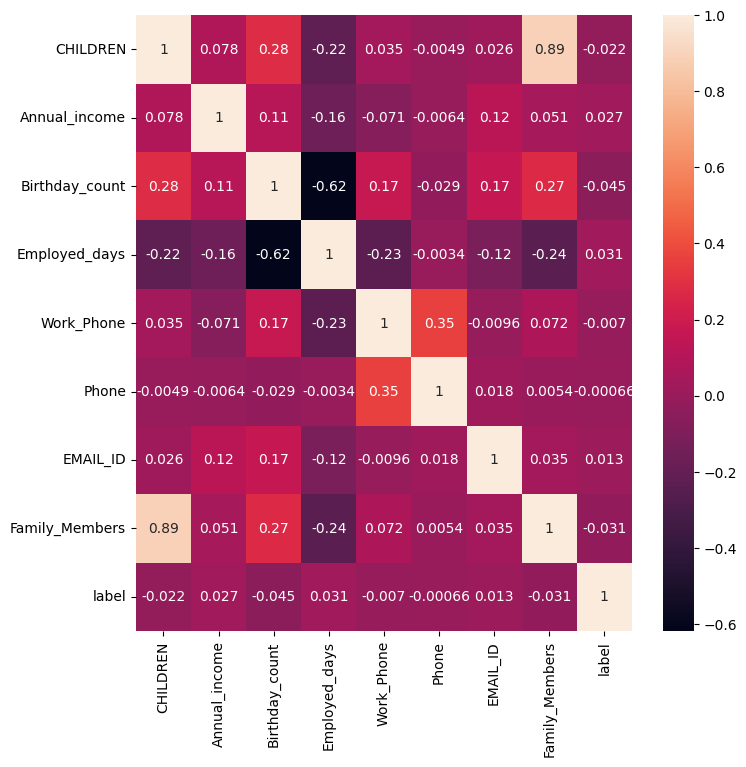

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(corr_df.corr(),annot = True)
plt.show()

Birvariate correlation is found between children and family members but correlation with target variable is very weak. The top variables that correlate to an extent are Annual_income, Employed_days.

## Preprocessing

Necessary preprocessing was implemented to ensure accuracy and success in our methods and visualization.

*   Annual income: Median value was used to repalce null values, due to observed spread of data and taking outliers into consideration; median was the most sensible choice.
*   Gender: Null values were replaced with "Female" values; there was no apparent correlation observed between gender and the target variable.
*   Birthday: Mean value was used to repalce null values.
*   Rows with Occupation Type null were dropped; no reasonable method was found to fill in values based on existing correlation between categorical and numerical variables.








In [ ]:
pre_cc = cc_final

In [ ]:
pre_cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
pre_cc['Annual_income'].fillna(pre_cc['Annual_income'].median(),inplace =True)
pre_cc['Birthday_count'].fillna(pre_cc['Birthday_count'].mean(),inplace =True)

In [ ]:
pre_cc['GENDER'].fillna(pre_cc['GENDER'].mode()[0],inplace =True)
pre_cc.dropna(subset=['Type_Occupation'], inplace=True)

In [ ]:
#converting age into years
pre_cc['Age_conv'] = np.abs(pre_cc['Birthday_count'])/365

In [ ]:
#converting employed days into years
pre_cc['Employed_years'] = (pre_cc['Employed_days']/365)

In [ ]:
pre_cc.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
Age_conv           0
Employed_years     0
dtype: int64

In [ ]:
pre_cc = pre_cc.reset_index(drop=True)
pre_cc.shape

(1060, 21)

OneHotEncoder
OneHotEncoder machine learning method was implemented to efficiently standardize all variable names to prepare for data modeling techniques.

In [ ]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

cat_attribs = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']

enc_df = pd.DataFrame(ohe.fit_transform(pre_cc[['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']]), columns = ohe.get_feature_names_out())

In [ ]:
cc_df = pre_cc.join(enc_df)

In [ ]:
cc_df.drop(cat_attribs,axis=1,inplace=True)

## Data Split

In [ ]:
X = cc_df.drop(['Ind_ID','label'],axis = 'columns')
y = cc_df['label']

Due to an imbalance of target variables (0 and 1, getting approved vs no approval), we used the function SMOTE() to create synthetic data and balance our variable distribution. After implementation, more accurate results were observed, as shown below.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

1    942
0    942
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 42)

print(f"X train shape: {X_train.shape}")
print(f"X test  shape: {X_test.shape}")

X train shape: (1318, 54)
X test  shape: (566, 54)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train = X_train_scaled
X_test = X_test_scaled

## Data Modelling Techniques

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name",
                                  "Best parameters",
                                   "Train Prec",
                                   "Test  Prec",
                                   "Train Recall",
                                   "Test Recall",
                                   "Train  AUC",
                                   "Test   AUC",
                                   "Train   F1",
                                   "Test    F1",
                                   "TP",
                                   "FP",
                                   "TN",
                                   "FN"
                                    ])

In [ ]:
#if you need to clear out the explog df outputs, uncomment and run this cell

# expLog.drop(expLog.index, inplace=True)

### Logistic Regression

- Logistic Regression is one of the most popular binary classification models. It is commonly used to estimate the probability that a sample belongs to a particular class. It was the most obvious choice to use for our modeling techniques, considering the nature of our target variable.

In [ ]:
%%time
np.random.seed(42)
import json

lr = LogisticRegression(class_weight='balanced',random_state=42)

params_grid = {'penalty':('l1','l2'),
               'solver':('liblinear', 'lbfgs'),
               'tol' : (0.0001,0.00001,0.000001),
               'C': (10,1,0.1,0.01,0.001),
               'max_iter': [100]}


lr_grid = GridSearchCV(lr, params_grid,scoring='f1',cv =5, n_jobs = -1)
lr_grid.fit(X_train,y_train)

print("Best parameters: ")
best_params = lr_grid.best_estimator_.get_params()
# print(best_params)
param_dump = []
for i in sorted(params_grid):
  param_dump.append((i, best_params[i]))
  print("\t"+str(i)+": " +str(best_params[i]))

# start = time()
lr_model = lr_grid.best_estimator_.fit(X_train,y_train)

#roc-auc score
best_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1])
# train_time = round(time()- start, 4)
best_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

#f1 score
best_train_f1= f1_score(y_train, lr_model.predict(X_train))
best_test_f1 = f1_score(y_test, lr_model.predict(X_test))

#precision
best_train_precision = precision_score(y_train, lr_model.predict(X_train))
best_test_precision  = precision_score(y_test, lr_model.predict(X_test))

#recall
best_train_recall = recall_score(y_train, lr_model.predict(X_train))
best_test_recall  = recall_score(y_test, lr_model.predict(X_test))


#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, lr_model.predict(X_test)).ravel()

exp_name = "Logistic Regression"
expLog.loc[len(expLog)] = [exp_name] + list([
                json.dumps(param_dump),
                # json.dumps(best_params),
                round(best_train_recall,3),
                round(best_test_recall,3),
                round(best_train_precision,3),
                round(best_test_precision,3),
                round(best_train_auc,3),
                round(best_test_auc,3),
                round(best_train_f1,3),
                round(best_test_f1,3),
                tp, fp, tn, fn
               ],)

Best parameters: 
	C: 10
	max_iter: 100
	penalty: l1
	solver: liblinear
	tol: 1e-05
CPU times: user 7.52 s, sys: 129 ms, total: 7.65 s
Wall time: 55.2 s


In [ ]:
pd.set_option('display.max_colwidth', None)
expLog

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 1e-05]]",0.822,0.788,0.766,0.741,0.845,0.822,0.793,0.764,223,78,205,60


In [ ]:
pd.set_option('display.max_colwidth', None) #without min max scaling
expLog

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 0.0001]]",0.824,0.792,0.767,0.742,0.845,0.822,0.794,0.766,224,78,205,59



- To find the optimal set of hyperparameters for a given classification model, GridSearchCV is used. It searches through all the given parameter choices and evaluates each of the combinations using Cross-Validation method. The `best_params_` attribute gives the best set of hyperparameters evaluated and `best_estimator` allows us to fit the model on an unseen test set with best hyperparameters chosen.
- Parameters like C (regularization parameter), penalty, solver, tolerance are tuned with various choices to output the best results.
- The ROC-AUC score of the model gives a decent score on how well the model is able to distinguish the classes but the F1 score (harmonic mean of precision and recall) shows a decent score indicating that it is able to predict the right labels for the samples. The False predictions are a bit high resulting as a average-performing model for this dataset.

### Support Vector Machines

SVM also known as Support Vector machines is a supervised learning ML algorithm. This technique classifies data by finding the best hyperplane that separates all data points of one class from those of the other class [1]. It is also one of the popular binary classifiers.

In [ ]:
%%time
np.random.seed(42)
import json

svm = SVC(class_weight='balanced',probability= True, random_state=42)

params_grid = {'kernel':('rbf','poly'),
               'degree':(1,2,3),
              #  'gamma':(0.001, 0.01, 1, 10),
              #  'tol' : (0.0001,0.00001,0.000001),
               'C': (0.1, 1, 10)
          }


svm_grid = GridSearchCV(svm, params_grid,scoring='f1',cv =5, n_jobs = -1)
svm_grid.fit(X_train,y_train)

print("Best parameters: ")
best_params = svm_grid.best_estimator_.get_params()
# print(best_params)
param_dump = []
for i in sorted(params_grid):
  param_dump.append((i, best_params[i]))
  print("\t"+str(i)+": " +str(best_params[i]))

# start = time()
svm_model = svm_grid.best_estimator_.fit(X_train,y_train)

#roc-auc score
best_train_auc = roc_auc_score(y_train, svm_model.predict_proba(X_train)[:, 1])
# train_time = round(time()- start, 4)
best_test_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

#f1 score
best_train_f1= f1_score(y_train, svm_model.predict(X_train))
best_test_f1 = f1_score(y_test, svm_model.predict(X_test))

#precision
best_train_precision = precision_score(y_train, svm_model.predict(X_train))
best_test_precision  = precision_score(y_test, svm_model.predict(X_test))

#recall
best_train_recall = recall_score(y_train, svm_model.predict(X_train))
best_test_recall  = recall_score(y_test, svm_model.predict(X_test))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, svm_model.predict(X_test)).ravel()

exp_name = "Support Vector Machines"
expLog.loc[len(expLog)] = [exp_name] + list([
                json.dumps(param_dump),
                # json.dumps(best_params),
                round(best_train_recall,3),
                round(best_test_recall,3),
                round(best_train_precision,3),
                round(best_test_precision,3),
                round(best_train_auc,3),
                round(best_test_auc,3),
                round(best_train_f1,3),
                round(best_test_f1,3),
                tp, fp, tn, fn
               ],)

Best parameters: 
	C: 10
	degree: 1
	kernel: rbf
CPU times: user 1.54 s, sys: 89.8 ms, total: 1.63 s
Wall time: 30.4 s


In [ ]:
expLog

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 1e-05]]",0.822,0.788,0.766,0.741,0.845,0.822,0.793,0.764,223,78,205,60
1,Support Vector Machines,"[[""C"", 10], [""degree"", 1], [""kernel"", ""rbf""]]",0.976,0.947,0.965,0.931,0.997,0.982,0.971,0.939,268,20,263,15


In [ ]:
expLog #without min max scaling

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 0.0001]]",0.824,0.792,0.767,0.742,0.845,0.822,0.794,0.766,224,78,205,59
1,Support Vector Machines,"[[""C"", 10], [""degree"", 1], [""kernel"", ""rbf""]]",0.589,0.541,0.622,0.614,0.679,0.649,0.605,0.575,153,96,187,130



- Using GridSearchCV, parameters like C, degree of the polynomial and kernel are hypertuned to find the best parameter values.
-The results indicate a well performing model from ROC-AUC score, the F1 score (harmonic mean of precision and recall) when used with min - max scaling. False predictions have significantly reduced when compared, resulting as a better model.

### Random Forest Classifier

 Random Forest models combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems. [2]

In [ ]:
%%time
np.random.seed(42)
import json

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

params_grid = {
            'max_depth': [5,10,15],
            'max_features': [10,15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1,3],
            'bootstrap': [True],
            'n_estimators':[25,50,100]
          }


rfc_grid = GridSearchCV(rfc, params_grid,scoring='f1',cv =5, n_jobs = -1)
rfc_grid.fit(X_train,y_train)

print("Best parameters: ")
best_params = rfc_grid.best_estimator_.get_params()
# print(best_params)
param_dump = []
for i in sorted(params_grid):
  param_dump.append((i, best_params[i]))
  print("\t"+str(i)+": " +str(best_params[i]))

# start = time()
rfc_model = rfc_grid.best_estimator_.fit(X_train,y_train)

#roc-auc score
best_train_auc = roc_auc_score(y_train, rfc_model.predict_proba(X_train)[:, 1])
# train_time = round(time()- start, 4)
best_test_auc = roc_auc_score(y_test, rfc_model.predict_proba(X_test)[:, 1])

#f1 score
best_train_f1= f1_score(y_train, rfc_model.predict(X_train))
best_test_f1 = f1_score(y_test, rfc_model.predict(X_test))

#precision
best_train_precision = precision_score(y_train, rfc_model.predict(X_train))
best_test_precision  = precision_score(y_test, rfc_model.predict(X_test))

#recall
best_train_recall = recall_score(y_train, rfc_model.predict(X_train))
best_test_recall  = recall_score(y_test, rfc_model.predict(X_test))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, rfc_model.predict(X_test)).ravel()

exp_name = "Random Forest Classiffier"
expLog.loc[len(expLog)] = [exp_name] + list([
                json.dumps(param_dump),
                # json.dumps(best_params),
                round(best_train_recall,3),
                round(best_test_recall,3),
                round(best_train_precision,3),
                round(best_test_precision,3),
                round(best_train_auc,3),
                round(best_test_auc,3),
                round(best_train_f1,3),
                round(best_test_f1,3),
                tp, fp, tn, fn
               ],)

Best parameters: 
	bootstrap: True
	max_depth: 15
	max_features: 10
	min_samples_leaf: 1
	min_samples_split: 2
	n_estimators: 100
CPU times: user 3.19 s, sys: 317 ms, total: 3.51 s
Wall time: 1min 36s


In [ ]:
expLog

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 1e-05]]",0.822,0.788,0.766,0.741,0.845,0.822,0.793,0.764,223,78,205,60
1,Support Vector Machines,"[[""C"", 10], [""degree"", 1], [""kernel"", ""rbf""]]",0.976,0.947,0.965,0.931,0.997,0.982,0.971,0.939,268,20,263,15
2,Random Forest Classiffier,"[[""bootstrap"", true], [""max_depth"", 15], [""max_features"", 10], [""min_samples_leaf"", 1], [""min_samples_split"", 2], [""n_estimators"", 100]]",0.997,0.936,0.997,0.985,1.000,0.986,0.997,0.960,265,4,279,18


In [ ]:
expLog #without min max scaling

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 0.0001]]",0.824,0.792,0.767,0.742,0.845,0.822,0.794,0.766,224,78,205,59
1,Support Vector Machines,"[[""C"", 10], [""degree"", 1], [""kernel"", ""rbf""]]",0.589,0.541,0.622,0.614,0.679,0.649,0.605,0.575,153,96,187,130
2,Random Forest Classiffier,"[[""bootstrap"", true], [""max_depth"", 15], [""max_features"", 10], [""min_samples_leaf"", 1], [""min_samples_split"", 2], [""n_estimators"", 100]]",0.997,0.936,0.997,0.985,1.000,0.986,0.997,0.960,265,4,279,18


- Using GridSearchCV, parameters like max_depth,max_features,min_samples_leaf, min_samples_split and n_estimators are hypertuned to get the best combinations of parameters.
- Random Forest Classifier shows a very impressive ROC-AUC score and F1 score (harmonic mean of precision and recall) that the model has been trained and has the ability to correctly idenitfy and predict classes. The False predictions are very much low for this technique which is very much essential in identifying potential card applicants and is able to predict the true predictions as much as possible.

### Decision Trees

Decision Tree Classifiers is also a yet another supervised learning ML model where it predicts class by learning simple decision rules inferred from training data. For predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.[3]

In [ ]:
%%time
np.random.seed(42)
import json

dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)

params_grid = {
            # 'max_depth': [2,5,10,15,20],
            'max_features': [2,5],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1,3]
          }


dtc_grid = GridSearchCV(dtc, params_grid,scoring='f1',cv =5, n_jobs = -1)
dtc_grid.fit(X_train,y_train)

print("Best parameters: ")
best_params = dtc_grid.best_estimator_.get_params()
# print(best_params)
param_dump = []
for i in sorted(params_grid):
  param_dump.append((i, best_params[i]))
  print("\t"+str(i)+": " +str(best_params[i]))

# start = time()
dtc_model = dtc_grid.best_estimator_.fit(X_train,y_train)

#roc-auc score
best_train_auc = roc_auc_score(y_train, dtc_model.predict_proba(X_train)[:, 1])
# train_time = round(time()- start, 4)
best_test_auc = roc_auc_score(y_test, dtc_model.predict_proba(X_test)[:, 1])

#f1 score
best_train_f1= f1_score(y_train, dtc_model.predict(X_train))
best_test_f1 = f1_score(y_test, dtc_model.predict(X_test))

#precision
best_train_precision = precision_score(y_train, dtc_model.predict(X_train))
best_test_precision  = precision_score(y_test, dtc_model.predict(X_test))

#recall
best_train_recall = recall_score(y_train, dtc_model.predict(X_train))
best_test_recall  = recall_score(y_test, dtc_model.predict(X_test))

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, dtc_model.predict(X_test)).ravel()

exp_name = "Decision Tree Classiffier"
expLog.loc[len(expLog)] = [exp_name] + list([
                json.dumps(param_dump),
                # json.dumps(best_params),
                round(best_train_recall,3),
                round(best_test_recall,3),
                round(best_train_precision,3),
                round(best_test_precision,3),
                round(best_train_auc,3),
                round(best_test_auc,3),
                round(best_train_f1,3),
                round(best_test_f1,3),
                tp, fp, tn, fn
               ],)

Best parameters: 
	max_features: 5
	min_samples_leaf: 1
	min_samples_split: 5
CPU times: user 108 ms, sys: 5.79 ms, total: 114 ms
Wall time: 285 ms


In [ ]:
expLog

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 1e-05]]",0.822,0.788,0.766,0.741,0.845,0.822,0.793,0.764,223,78,205,60
1,Support Vector Machines,"[[""C"", 10], [""degree"", 1], [""kernel"", ""rbf""]]",0.976,0.947,0.965,0.931,0.997,0.982,0.971,0.939,268,20,263,15
2,Random Forest Classiffier,"[[""bootstrap"", true], [""max_depth"", 15], [""max_features"", 10], [""min_samples_leaf"", 1], [""min_samples_split"", 2], [""n_estimators"", 100]]",0.997,0.936,0.997,0.985,1.000,0.986,0.997,0.960,265,4,279,18
3,Decision Tree Classiffier,"[[""max_features"", 5], [""min_samples_leaf"", 1], [""min_samples_split"", 5]]",0.962,0.876,0.992,0.932,0.999,0.922,0.977,0.903,248,18,265,35


In [ ]:
expLog #without min max scaling

,exp_name,Best parameters,Train Prec,Test Prec,Train Recall,Test Recall,Train AUC,Test AUC,Train F1,Test F1,TP,FP,TN,FN
0,Logistic Regression,"[[""C"", 10], [""max_iter"", 100], [""penalty"", ""l1""], [""solver"", ""liblinear""], [""tol"", 0.0001]]",0.824,0.792,0.767,0.742,0.845,0.822,0.794,0.766,224,78,205,59
1,Support Vector Machines,"[[""C"", 10], [""degree"", 1], [""kernel"", ""rbf""]]",0.589,0.541,0.622,0.614,0.679,0.649,0.605,0.575,153,96,187,130
2,Random Forest Classiffier,"[[""bootstrap"", true], [""max_depth"", 15], [""max_features"", 10], [""min_samples_leaf"", 1], [""min_samples_split"", 2], [""n_estimators"", 100]]",0.997,0.936,0.997,0.985,1.000,0.986,0.997,0.960,265,4,279,18
3,Decision Tree Classiffier,"[[""max_features"", 5], [""min_samples_leaf"", 1], [""min_samples_split"", 5]]",0.962,0.876,0.992,0.932,0.999,0.922,0.977,0.903,248,18,265,35



- Using the same method GridSearchCV,max_features, min_samples_leaf and min_samples_split are tuned to give the best choice of parameters to predict on unseen data.
- Like Random Forest trees, Decision Tree performs well on F1 score and ROC AUC score but the scores drops atleast by 20% on test data which does not reflect the same ability as seen on training data. It is able to identify true predictions with slightly higher false predictions when compared to Random Forest trees.

## ROC Curve Comparison

The models are run on dataset that are standardized using Min-Max scaling to view the ROC curves of different models.

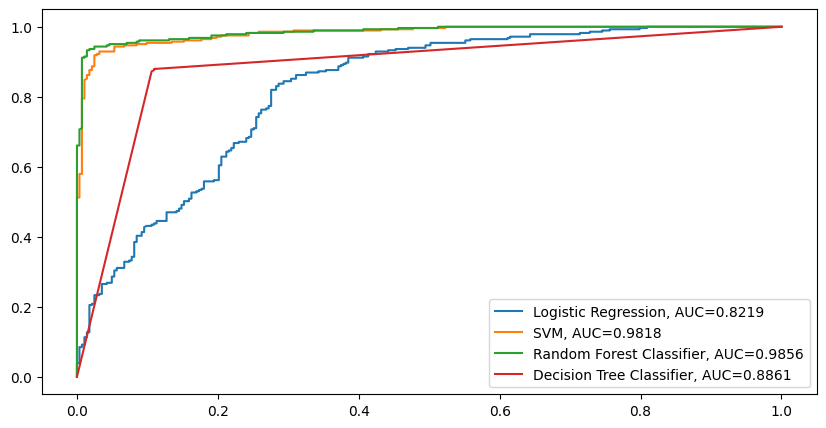

In [ ]:
#reference [4]
fig, axes = plt.subplots(figsize=(10, 5))

#logistic regression model
model = LogisticRegression(C=10,max_iter=100, penalty = 'l1', solver='liblinear',tol=1e-05,class_weight='balanced',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#support vector machines
model = SVC(C=10,degree=1,kernel='rbf',class_weight='balanced',probability= True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#Random Forest
model = RandomForestClassifier(bootstrap=True,max_depth=10,max_features=10,min_samples_leaf=1,min_samples_split=2,n_estimators= 100,class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

#Decision Trees
model = DecisionTreeClassifier(max_features=5,min_samples_leaf=1,min_samples_split=2,class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

#add legend
plt.legend()

Thus it is notable out of the four classifiers modeled on this dataset, **Random Forest** performs well in predicting the classes with less False predictions with and without the use of scaling. With more data, the model will definitely be able to predict more accurately without any false predictions.

## Feature Importance Study


Below are shown two analyses and graphs showing the feature importance resulting from our decision tree and random forest regression.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

feature_importance = dtc_model.feature_importances_
feature_name = X.columns


In [ ]:
feature_importances_df = pd.DataFrame({'Feature': feature_name, 'Importance': feature_importance})


In [ ]:
print(feature_importances_df)

                                    Feature  Importance
0                                  CHILDREN    0.060685
1                             Annual_income    0.026953
2                            Birthday_count    0.070163
3                             Employed_days    0.032195
4                              Mobile_phone    0.000000
5                                Work_Phone    0.029540
6                                     Phone    0.011305
7                                  EMAIL_ID    0.005173
8                            Family_Members    0.003439
9                                  Age_conv    0.042492
10                           Employed_years    0.058948
11                                 GENDER_F    0.202212
12                                 GENDER_M    0.003157
13                              Car_Owner_N    0.008727
14                              Car_Owner_Y    0.003180
15                          Propert_Owner_N    0.014697
16                          Propert_Owner_Y    0

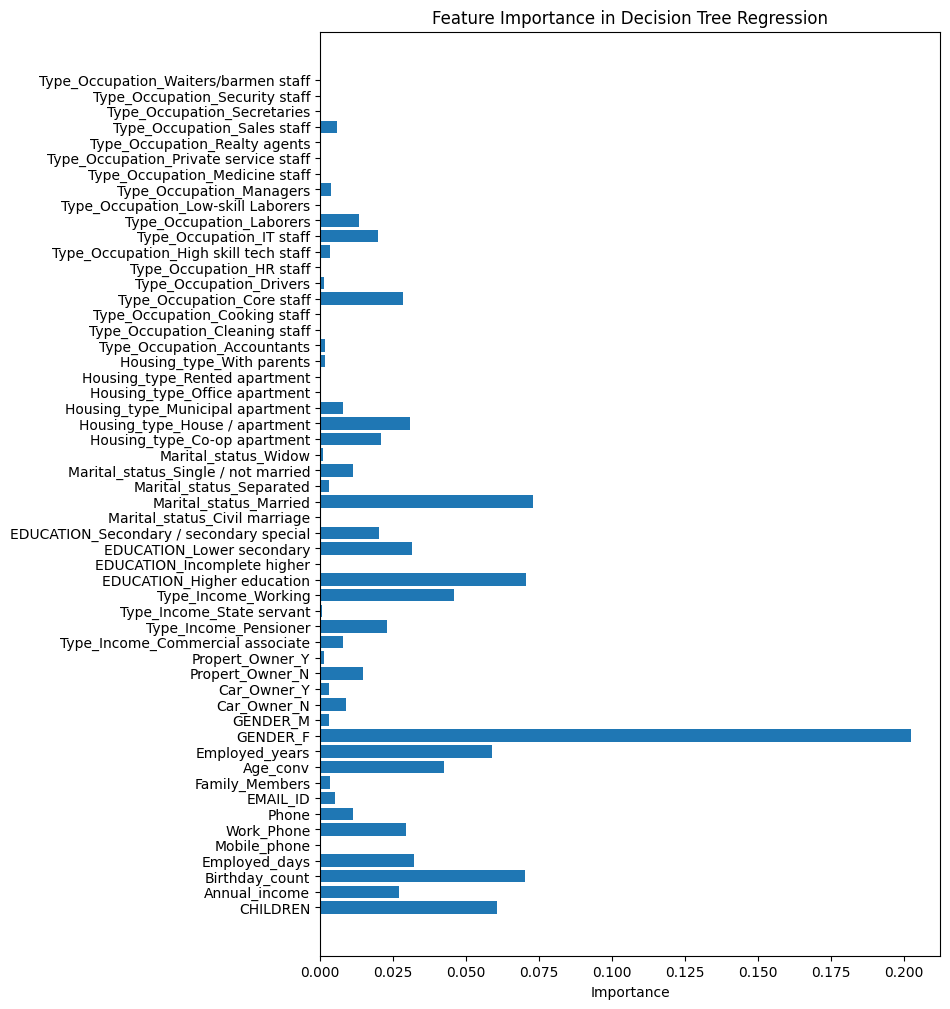

In [ ]:
plt.figure(figsize=(8, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Regression')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

feature_importances = rfc_model.feature_importances_
feature_names = X.columns

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})


In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [ ]:
print(feature_importance_df)


                                    Feature  Importance
10                           Employed_years    0.077743
3                             Employed_days    0.074559
9                                  Age_conv    0.063652
2                            Birthday_count    0.059825
1                             Annual_income    0.051652
12                                 GENDER_M    0.050388
11                                 GENDER_F    0.048596
26                   Marital_status_Married    0.043975
24  EDUCATION_Secondary / secondary special    0.036361
15                          Propert_Owner_N    0.034098
39               Type_Occupation_Core staff    0.033168
20                      Type_Income_Working    0.032648
28      Marital_status_Single / not married    0.031920
16                          Propert_Owner_Y    0.030357
5                                Work_Phone    0.026876
8                            Family_Members    0.025736
17         Type_Income_Commercial associate    0

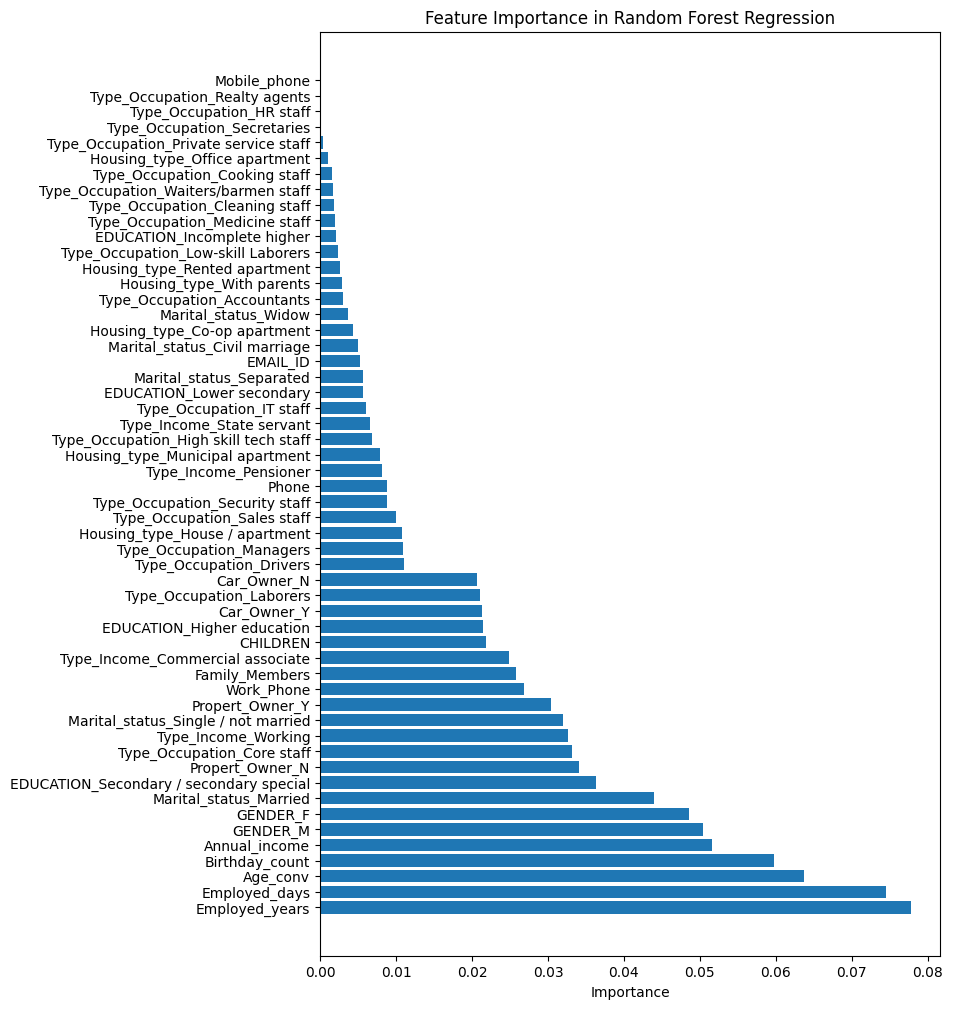

In [ ]:
plt.figure(figsize=(8, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regression')
plt.show()

# Personal Contribution Statement

#### Pooja Rajan

- We all learned and performed EDA individually and selected the best results of the EDA performed. Contributed to variable visualisations part - basic EDA, bivariate analysis and correlation analysis.
- As a team we all took the oppurtunity to learn and train the models on our own using different methods and hyperparameter tuning and we selected the top algorithms that worked for our data and incorporated into the notebook.
- Proofread the entire notebook.

#### Rajaram Madhavan

*   All of us performed EDA and Prediction modeling individually. Then, we compared and learned from each other.
*   Contributed to adding visualizations such as Feature importance and univariate data analysis and improving prediction scores by reducing imbalance in the dataset with SMOTE
*   Proofread the entire notebook.







####Isabella Kowalczyk

*   We each performed our own analyses in order to learn more and increase our chances of finding insightful statistics. We worked together via Zoom call to find the best results among our work. I contributed to feature importance, ROC, and other data modelling techniques.
*   Proofread entire notebook with team members, specifically proofreading data headings and explanations.



# References

1. https://www.mathworks.com/help/stats/support-vector-machines-for-binary-classification.html#:~:text=You%20can%20use%20a%20support,margin%20between%20the%20two%20classes.

2. https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems

3. https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

4. https://www.statology.org/plot-multiple-roc-curves-python/

